# Res Net 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [2]:
resnet50 = ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
up = files.upload()

Saving 오뎅탕.jpg to 오뎅탕.jpg


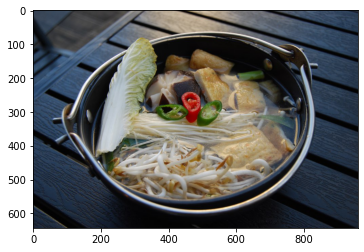

In [4]:
img = Image.open('오뎅탕.jpg')
plt.imshow(img);

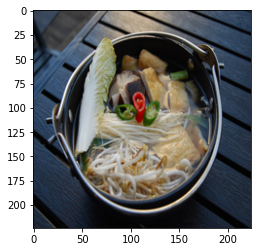

In [5]:
img = img.resize((224,224))
plt.imshow(img);

In [6]:
np.array(img).shape

(224, 224, 3)

- 이미지 예측

In [7]:
yhat = resnet50.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n04286575', 'spotlight', 0.19604991),
   ('n02909870', 'bucket', 0.16841815),
   ('n02804414', 'bassinet', 0.119668506),
   ('n02747177', 'ashcan', 0.11693955),
   ('n04204238', 'shopping_basket', 0.051562183)]])

- 이미지를 중앙으로 위치하여 자르기

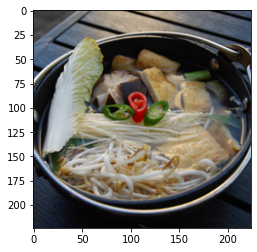

In [9]:
from image_util import center_image
img = Image.open('오뎅탕.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img);

In [11]:
yhat = resnet50.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02939185', 'caldron', 0.24859637),
   ('n02747177', 'ashcan', 0.099845015),
   ('n03633091', 'ladle', 0.07428171),
   ('n04286575', 'spotlight', 0.06951996),
   ('n02909870', 'bucket', 0.06734618)]])